#Insertion-sort vs Merge-sort
L'obiettivo di questo esercizio è di confrontare i due algoritmi di ordinamento insertion sort e merge sort. A questo proposito verrano generati dei test per valutarne le prestazioni e comprenderne vantaggi e svantaggi.




##Spiegazione teorica del problema
* **Insertion-sort**: algoritmo che ordina l'array considerando un elemento alla volta. Inzia considerando il secondo elemento dell'array e lo confronata con tutti gli elementi precedenti, spostando tutti gli elementi più grandi fino a quando l'emento giunge in posizione corretta.
* **Merge sort**: agloritmo ricorsivo basato sul concetto *Divide et Impera*, consiste nel dividere il problema in due sottosequenze e ordina, richiamando ricorsivamente l'agoritmo, le due sottosequenze. Infine fonde le due sottosequenze ordinate in modo da risolvere il problema ed avere una sequenza oridinata come risultato.

### Ipotesi
Sappiamo che se l'array è ordinato in ordine inverso, l'*Insertion Sort* sposta ogni elemento n volete, infatti è proprio il caso peggiore per questo algoritmo che lo porta ad avere una complessità temporale di Θ($n^2$). Sappiamo dalla teoria che anche nel caso medio la complessità rimane  Θ($n^2$). Invece nel caso migliore, quando l'array è già ordinato, la complessità è  Θ($n$) dato che basta che scorra una solo volta l'intero array.

La complessità del *Merge Sort* invece ha una complessità temporale di Θ($n$ $log$ $n$) in tutti i casi: migliore, peggiore e medio. Questo perchè l'algoritmo divide l'array in due e poi esegue la fusione delle sottosequenze a prescindere dal come è composto l'array.  

Quindi l'*Insertin Sort* è più efficiente per array quasi ordinati oppure per piccoli insieme di dati, dato che c'è una probabilità maggiore che gli elementi siano nella posizione corretta, mentre il *Merge Sort* è efficiente in grandi insieme di dati, ma allo stesso tempo non esistono casi particolari in cui è più efficiente.

## Documentazione del codice
In questa sezione del documento è presente il codice python di entrambi gli algoritmi. Sono presenti anche degli esempi per mostrare il lor funzionamento.

###Insertion Sort

In [ ]:
def insertion_sort(arr):
  for j in range(1,len(arr)):
      key = arr[j]
      i = j - 1
      while i >= 0 and arr[i] > key:
          arr[i + 1] = arr[i]
          i = i - 1
      arr[i + 1] = key
  return arr

A = [12, 1, 67, 2, 3, 3]
print(A)
print(insertion_sort(A))

[12, 1, 67, 2, 3, 3]
[1, 2, 3, 3, 12, 67]


###Merge Sort

In [ ]:
def merge(arr, l, m, r):
    n1 = m - l + 1
    n2 = r - m

    L = [0] * (n1)
    R = [0] * (n2)

    for i in range(0, n1):
        L[i] = arr[l + i]

    for j in range(0, n2):
        R[j] = arr[m + 1 + j]

    i = 0
    j = 0
    k = l

    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1

    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1


def merge_sort(arr, l, r):
    if l < r:

        m = l+(r-l)//2

        merge_sort(arr, l, m)
        merge_sort(arr, m+1, r)
        merge(arr, l, m, r)

A = [12, 1, 67, 2, 3, 3]
n = len(A)
print("Dato l'array: ")
for i in range(n):
    print("%d" % A[i],end=" ")

merge_sort(A, 0, n-1)
print("\n\nL'array ordinato è: ")
for i in range(n):
    print("%d" % A[i],end=" ")


Dato l'array: 
12 1 67 2 3 3 

L'array ordinato è: 
1 2 3 3 12 67 

## Esperimenti risultati e analisi

### Specifiche
Le specifiche hardwere della macchina dove vengono testi i due algoritmi sono:
* CPU: Intel Core i7-8565U 8-Core 4.6 GHz
* RAM: 8GB LPDDR3
* SSD: 256GB M.2 NVMe PCIe 3.0
* Sistema operativo: Ubuntu 24.04 LTS

La piattaforma usata per il test è il notebook JupyterLab.


### Esperimenti
Per confronatre i dui algoritmi e sopratutto vedere l'andamento del temporale a seconda della dimensione dell'array in ingresso, sono stati inseriti 5000 elementi di ordine casuale con valore da 1 a 100. Sono stati calcolati i tempi di esecuzione degli algoritmi ogni 500 elementi.

Il tempo di ogni eseperimento viene calcolato 5 volte per poi dopo fare la media. Per farlo sono state usate delle funzioni lambda e la lbreria timeit di python.

###Codice di test


In [ ]:
import matplotlib.pyplot as plt
import timeit
import pandas as pd
import random


array_size = [1, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
insertion_times = []
merge_times = []

for size in array_size:
  arr = []
  for i in range(size):
    arr.append(random.randint(0,100))

  insertion_time = timeit.timeit(lambda: insertion_sort(arr.copy()), number=5)
  insertion_times.append(insertion_time)

  merge_time = timeit.timeit(lambda: merge_sort(arr.copy(), 0, len(arr) - 1), number=5)
  merge_times.append(merge_time)

###Risulati esperimenti
Di seguito verranno mostrati i risultati ottenuti sopra in forma grafica, dove sull'asse delle x abbiamo il numero di elementi nell'array mentre sull'asse y il tempo dell'esecuzione dell'agloritmo.



####Insertion Sort
Come possiamo osservare dal grafico riportato sotto sembra che l'andamento temporale cresca in maniera quadratica all'aumento dei dati nell'array. Si può anche notare che finchè il numero degli elementi dell'array è contenuto (fino a circa 1500 elementi), l'andamento del tempo ha una crescita minore.


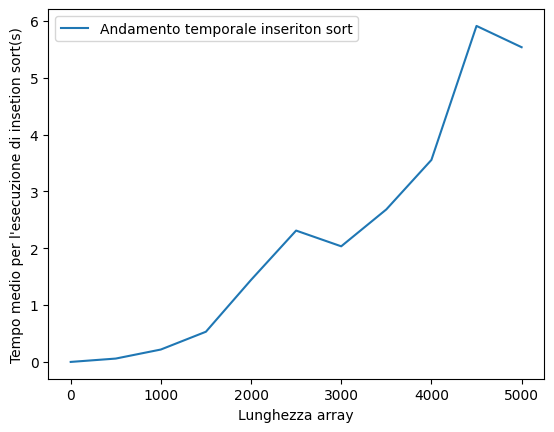

In [ ]:
plt.plot(array_size, insertion_times, label='Andamento temporale inseriton sort')
plt.xlabel('Lunghezza array')
plt.ylabel("Tempo medio per l'esecuzione di insetion sort(s)")
plt.legend()
plt.show()
plt.close()


####Merge Sort
Per quanto riguarda questo algoritmo, si può osservare una crescita temporale significativamente inferiore rispetto a quella dell'insertion sort. Dal grafico si può supporre che i tempi seguono un andamento di tipo n log n.

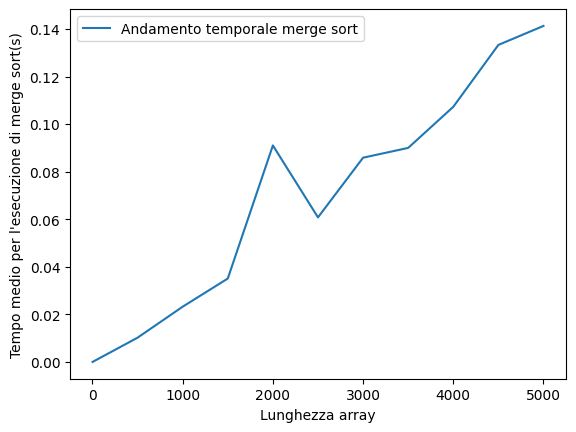

In [ ]:
plt.plot(array_size, merge_times, label='Andamento temporale merge sort')
plt.xlabel('Lunghezza array')
plt.ylabel("Tempo medio per l'esecuzione di merge sort(s)")
plt.legend()
plt.show()
plt.close()

##Conclusioni
I dati raccolti dagli esperimenti confermano le ipotesi iniziali. Infatti, l'*Insertion Sort* rimane efficiente finché deve ordinare un numero ristretto di elementi, con un andamento quasi lineare, mentre con l'aumentare degli elementi tende ad avere un andamento quadratico. Invece, il *Merge Sort* rimane efficiente per un insieme di tanti elementi, con un tempo di esecuzione che mantiene un andamento logaritmico anche con l'aumentare degli elementi. Questo lo rende particolarmente adatto per ordinare grandi volumi di dati, in cui riesce a mantenere prestazioni stabili e migliori rispetto all'Insertion Sort.